<a href="https://colab.research.google.com/github/AdrianOlazaran/IA_IB_AgoDec2024/blob/main/PIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Found 801 images belonging to 3 classes.
Found 199 images belonging to 3 classes.
Epoch 1/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.6316 - loss: 0.6731 - val_accuracy: 0.9246 - val_loss: -0.1252
Epoch 2/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.8539 - loss: 0.3203 - val_accuracy: 0.9246 - val_loss: -0.4626
Epoch 3/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.8106 - loss: 0.0027 - val_accuracy: 0.9196 - val_loss: -1.0234
Epoch 4/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.8221 - loss: -0.6914 - val_accuracy: 0.9246 - val_loss: -9.5486
Epoch 5/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.8320 - loss: -6.0075 - val_accuracy: 0.9246 - val_loss: -84.6495
Epoch 6/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.8224 - loss: -43.3914 - val_accuracy: 0.9246 - val_loss: -305.9346
Epoch 7/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.8204 - loss: -230.1193 - val_accuracy: 0.9196 - val_loss: -605.0731
Epoch 8/10
26/26 

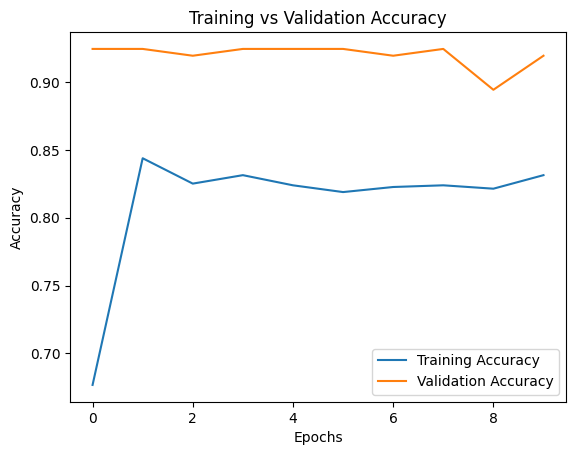

Found 1000 images belonging to 3 classes.
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 16s 16ms/step
Prediction: Infected, Actual: Normal
Prediction: Normal, Actual: Normal
Prediction: Normal, Actual: Normal
Prediction: Normal, Actual: Normal
Prediction: Normal, Actual: Normal
Prediction: Normal, Actual: Normal
Prediction: Normal, Actual: Normal
Prediction: Normal, Actual: Normal
Prediction: Normal, Actual: Normal
Prediction: Normal, Actual: Normal


In [9]:
# Load libraries
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from zipfile import ZipFile

# Define the dataset path (update with your dataset path from Kaggle)
dataset_path = "/content/archive.zip"  # Ruta corregida

# Verify that the file exists
if not os.path.exists(dataset_path):
    raise FileNotFoundError(f"The file {dataset_path} does not exist. Please verify the path.")

# Extract the dataset
extracted_path = "/content/dataset"  # Path where the dataset will be extracted
if not os.path.exists(extracted_path):
    os.makedirs(extracted_path)

with ZipFile(dataset_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_path)

# Define directories for training and testing
base_dir = os.path.join(extracted_path, "Data")  # Ajusta según la estructura de tu dataset
if not os.path.exists(base_dir):
    raise FileNotFoundError(f"The directory {base_dir} does not exist. Verify the extracted dataset structure.")

# Preprocessing: Load and prepare images
datagen = ImageDataGenerator(rescale=1.0 / 255.0, validation_split=0.2)  # Normalize images

# Training data generator
train_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(128, 128),  # Resize images to 128x128
    batch_size=32,
    class_mode='binary',
    subset='training'
)

# Validation data generator
validation_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

# CNN model definition
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
    verbose=1
)

# Plot training accuracy vs validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()

# Generate 10 predictions
test_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(128, 128),
    batch_size=1,
    class_mode='binary',
    shuffle=False  # Ensure consistency for predictions
)

predictions = model.predict(test_generator)
for i in range(10):
    predicted_label = 'Infected' if predictions[i] > 0.5 else 'Normal'
    actual_label = 'Infected' if test_generator.classes[i] == 1 else 'Normal'
    print(f"Prediction: {predicted_label}, Actual: {actual_label}")
